In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load the dataset into a DataFrame
df = pd.read_csv("HR-Employee-Attrition.csv")


In [16]:
# Display the first few rows of the dataset to verify column names and data
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [17]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [18]:
# Drop redundant columns
redundant_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(redundant_cols, axis=1)


In [19]:
# Rename columns for better readability
df = df.rename(columns={"Attrition": "Attrition_Status"})


In [20]:
# Drop duplicates if any
df = df.drop_duplicates()


In [21]:
# Example: Cleaning the 'Gender' column
df['Gender'] = df['Gender'].map({'Female': 'F', 'Male': 'M'})


In [22]:
# Remove NaN values
df = df.dropna()


<ipython-input-23-a64a54583fa6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


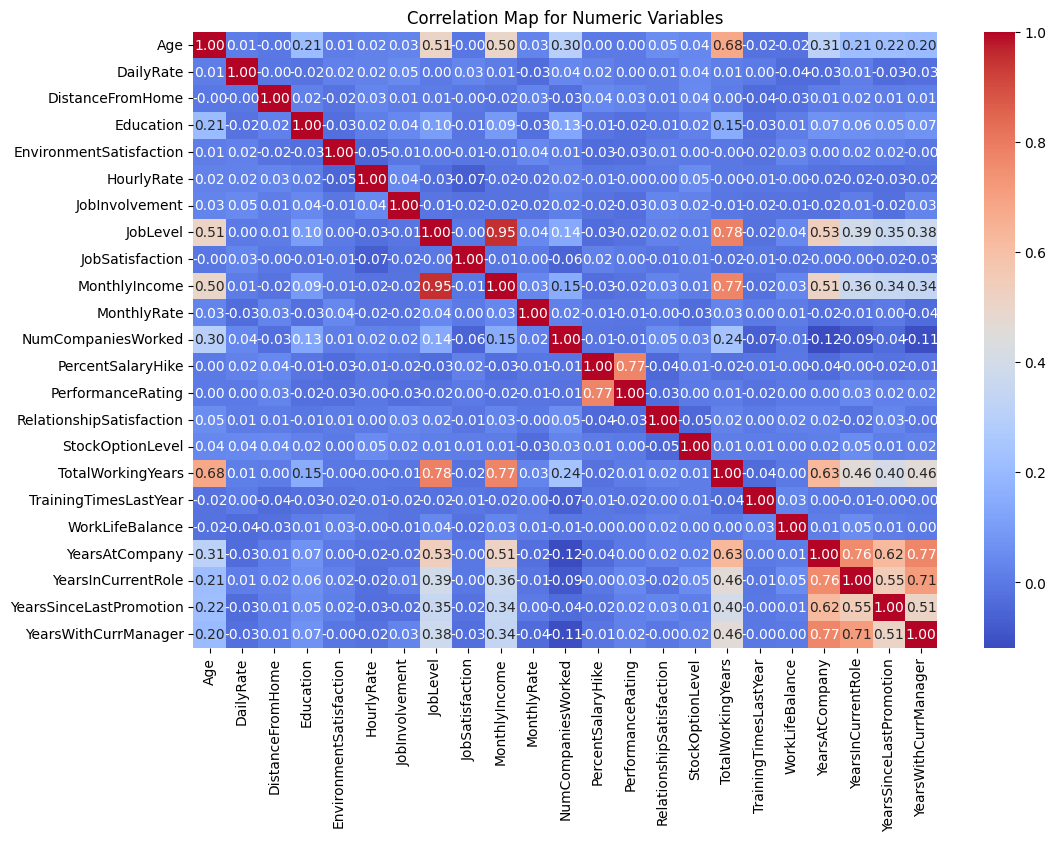

In [23]:
# Correlation map
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map for Numeric Variables")
plt.show()


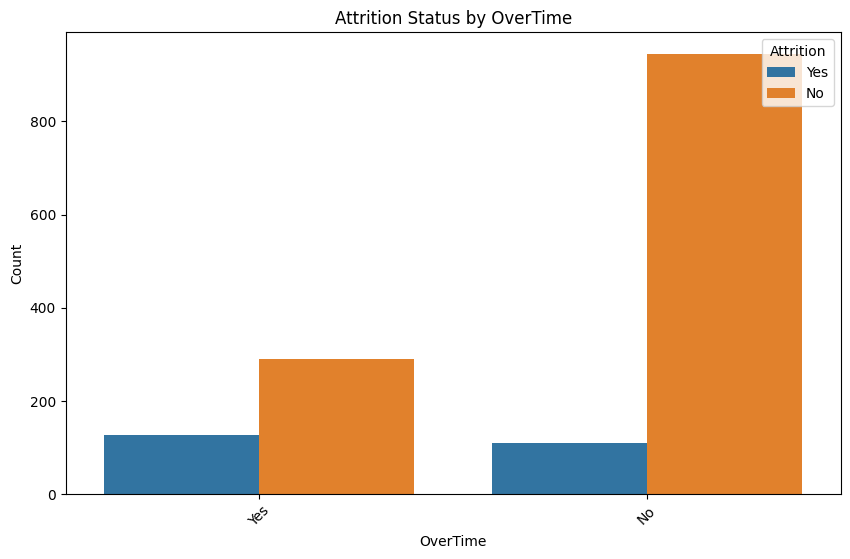

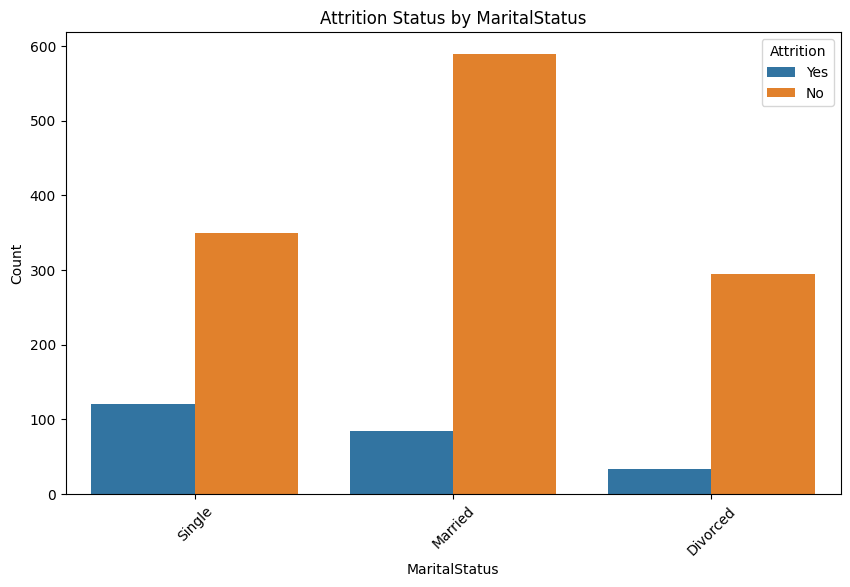

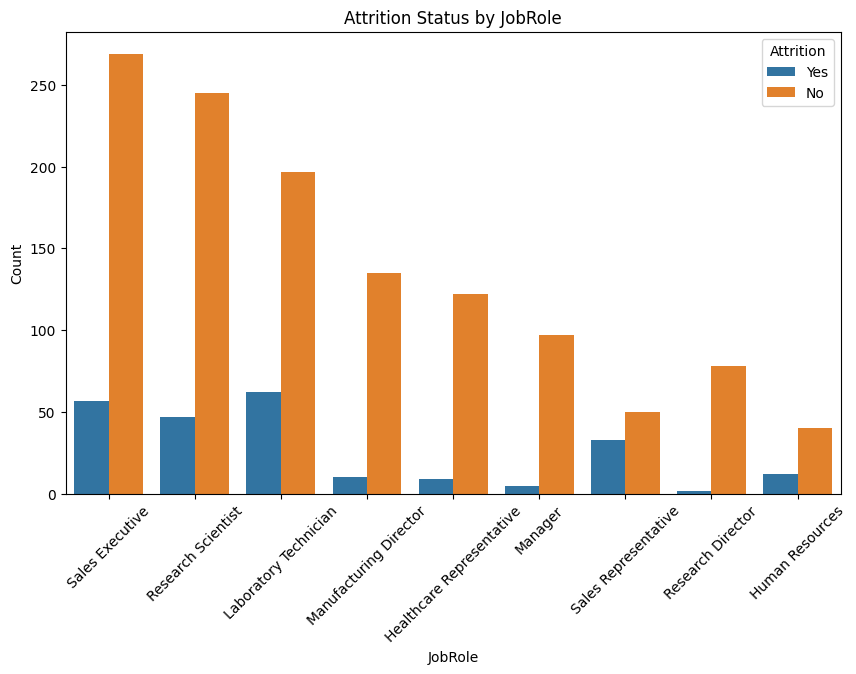

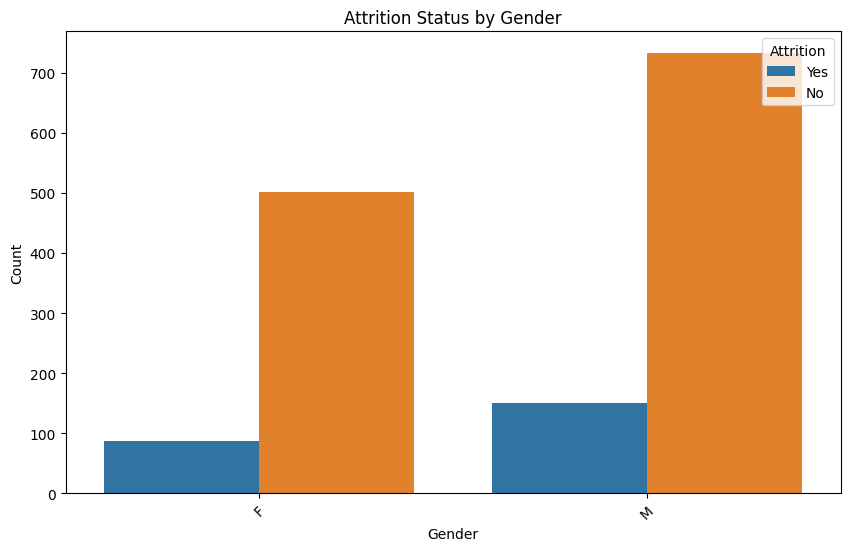

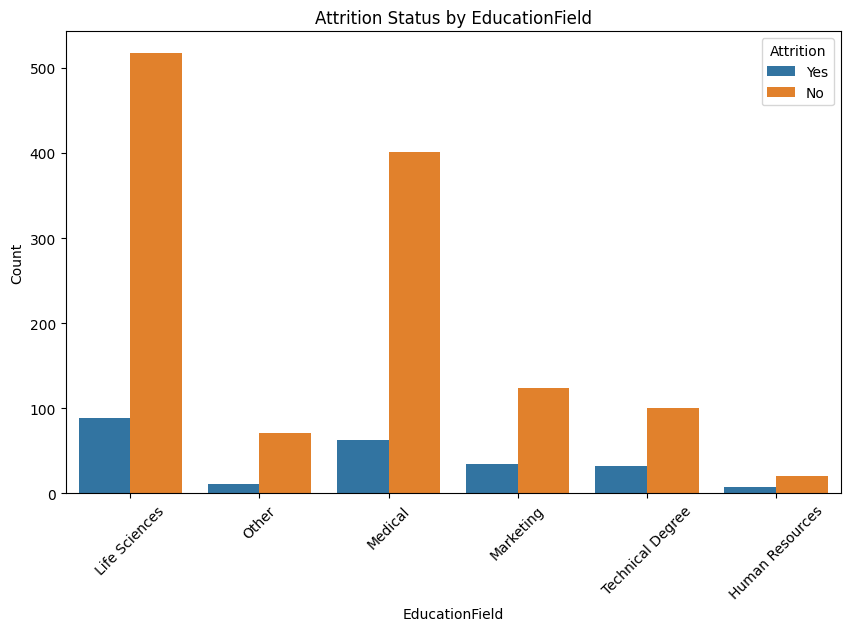

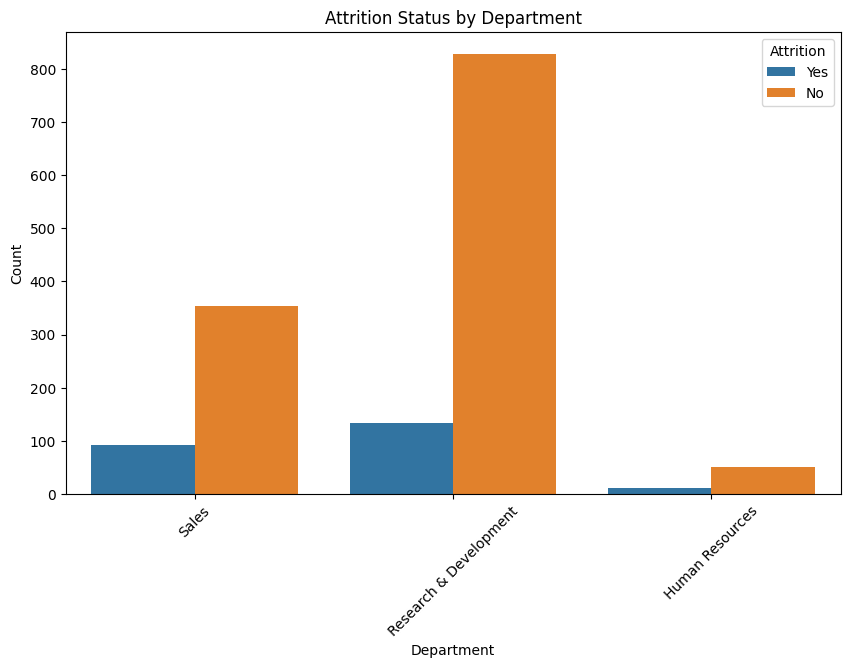

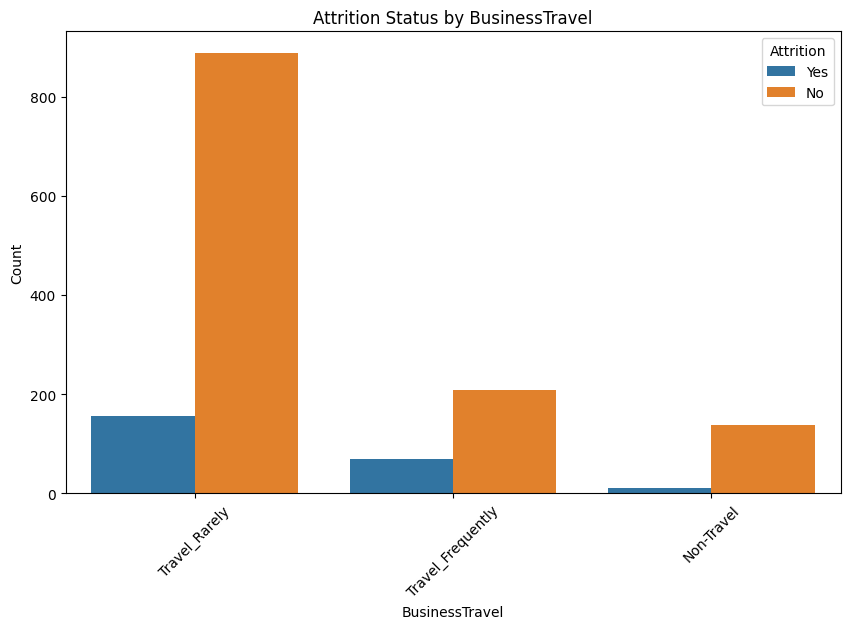

In [25]:
# Plotting categorical variables
categorical_vars = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, hue='Attrition_Status')
    plt.title(f"Attrition Status by {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Attrition', loc='upper right')
    plt.show()


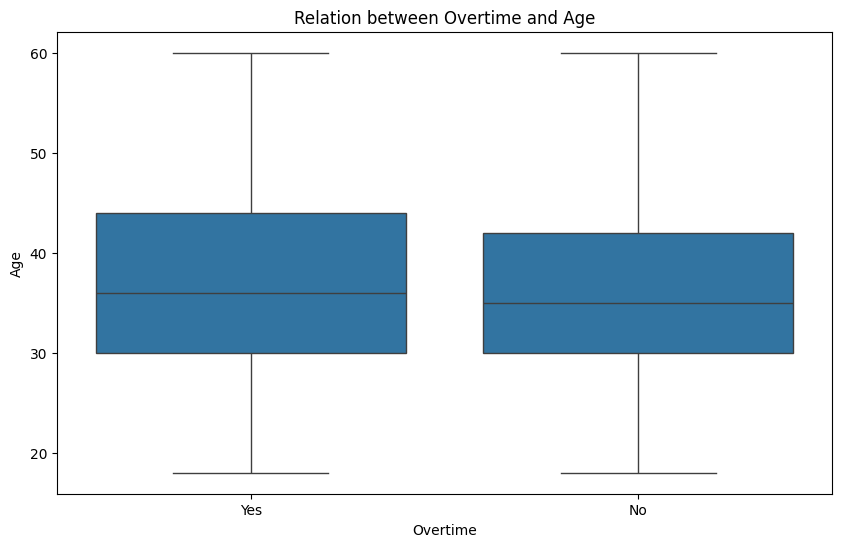

In [27]:
# Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='Age', data=df)
plt.title("Relation between Overtime and Age")
plt.xlabel("Overtime")
plt.ylabel("Age")
plt.show()
